______________________
# Summary
#### The aim of this notebook is to do Exploratory Data Analysis and as a result create 2 new promising features which are `Target_Class` and `Cabin_filled`. This notebook contains 4 insights into the data which are informative and helpful. 
#### Styling of the graphs drawn below were inspired from this [notebook](https://www.kaggle.com/dwin183287/tps-jan-2021-eda-models). Those graphs are on another level. Thanks [Sharlto Cope](https://www.kaggle.com/dwin183287)
#### My previous notebook in this series : [Making first submission for baseline score (0.788)](https://www.kaggle.com/abhinavnayak/making-first-submission-for-baseline-score-0-788)

<a id='content-table'></a>
## Table of Contents
1. [Looking at the null values](#tag1)
2. [Insight-1 : Survival rate among different classes in a column](#tag2)   
    - [`Pclass`](#tag2a)   
    - [`Sex`](#tag2b)   
    - [`SibSp`](#tag2c)   
    - [`Parch`](#tag2d)   
3. [Insight-2 : The `Ticket` column & creating new feature `Ticket_class`](#tag3)   
    - [Insight-1](#tag3a)    
    - [Insight-2](#tag3b)    
    - [Creating `Ticket_class` column](#tag3c)    
4. [Insight-3 : The `Cabin` column & creating new feature `Cabin_filled`](#tag4)
5. [Insight-4 : Corelation between `Fare` & `Pclass`](#tag5)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2021/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2021/test.csv')
submission = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2021/sample_submission.csv')

print(train.shape, test.shape, submission.shape)
print(train.columns)                             #printing the column names
print(set(train.columns)-set(test.columns))      #printing the target column

(100000, 12) (100000, 11) (100000, 2)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
{'Survived'}


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


<a id='tag1'></a>
## 1) [Looking at the null values](#content-table)

It is always helpful to remember which columns have very high percentage of null values. This will help you in [Insight-3](#tag4)

In [4]:
df = train.isnull().sum()/len(train)*100
df

PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age             3.292
SibSp           0.000
Parch           0.000
Ticket          4.623
Fare            0.134
Cabin          67.866
Embarked        0.250
dtype: float64

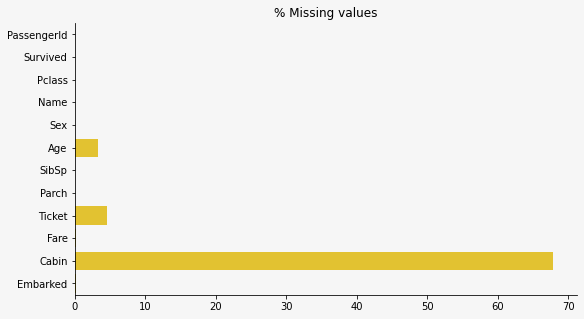

In [5]:
plt.figure(figsize = (9,5), facecolor='#f6f6f6')
sns.barplot(x = df.values, y = list(df.index), color='#ffd514')
plt.title('% Missing values')

ax = plt.gca()
ax.set_facecolor('#f6f6f6')
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

<a id='tag2'></a>
## 2) [Insight-1 : Survival rate among different classes in a column](#content-table)

I compared the survival rate for each type in a given column. This is done for categorical classes i.e `Pclass`,`Sex`, `SibSp`, `Parch`

<a id='tag2a'></a>
### a) [`Pclass`](#content-table)

In [6]:
train.groupby('Pclass')['Survived'].apply(lambda x: f'{x.sum()/len(x)*100: 0.2f} % ({x.sum()}/{len(x)}) Survived')

Pclass
1     57.98 % (17576/30315) Survived
2     52.50 % (15057/28679) Survived
3     24.73 % (10141/41006) Survived
Name: Survived, dtype: object

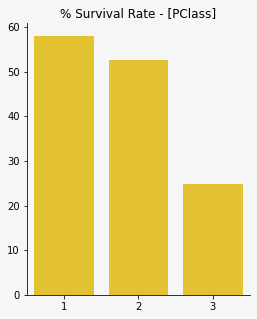

In [7]:
df = train.groupby('Pclass')['Survived'].apply(lambda x: x.sum()/len(x)*100)

plt.figure(figsize = (4,5), facecolor='#f6f6f6')
sns.barplot(x = list(df.index), y = df.values, color='#ffd514')
plt.title("% Survival Rate - [PClass]")

ax = plt.gca()
ax.set_facecolor('#f6f6f6')
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

> ### What does 57.98% mean here?
> *Class 1 in `Pclass` has `30315` people of the total `100000` people in train data. Of these `30315`, `17576` people have survived.   
> Hence survival rate in class 1 = `17576/30315 = 57.98%`*

3rd class ticket has the least survival rate of all. Therefore `Pclass` has high effect on `Survival`

<a id='tag2b'></a>
### b) [`Sex`](#content-table)

In [8]:
train.groupby('Sex')['Survived'].apply(lambda x: f'{x.sum()/len(x)*100: 0.2f} % ({x.sum()}/{len(x)}) Survived')

Sex
female     71.15 % (31226/43886) Survived
male       20.58 % (11548/56114) Survived
Name: Survived, dtype: object

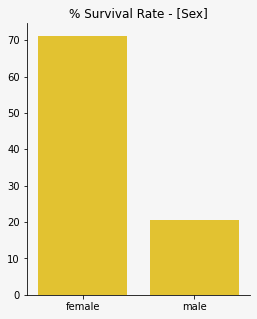

In [9]:
df = train.groupby('Sex')['Survived'].apply(lambda x: x.sum()/len(x)*100)

plt.figure(figsize = (4,5), facecolor='#f6f6f6')
sns.barplot(x = list(df.index), y = df.values, color='#ffd514')
plt.title('% Survival Rate - [Sex]')

ax = plt.gca()
ax.set_facecolor('#f6f6f6')
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

Female has survival rate of more than 3 times that of male. Therefore `Sex` has high effect on `Survival`

<a id='tag2c'></a>
### c) [`SibSp`](#content-table)

In [10]:
train.groupby('SibSp')['Survived'].apply(lambda x: f'{x.sum()/len(x)*100: 0.2f} % ({x.sum()}/{len(x)}) Survived')

SibSp
0     42.68 % (31291/73308) Survived
1      43.37 % (8570/19758) Survived
2       45.40 % (1681/3703) Survived
3        40.00 % (654/1635) Survived
4        37.59 % (439/1168) Survived
5          18.94 % (25/132) Survived
8         38.51 % (114/296) Survived
Name: Survived, dtype: object

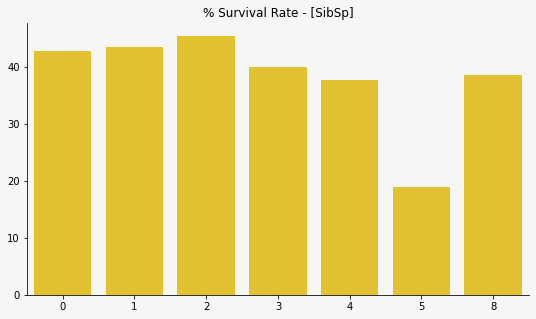

In [11]:
df = train.groupby('SibSp')['Survived'].apply(lambda x: x.sum()/len(x)*100)

plt.figure(figsize = (9,5), facecolor='#f6f6f6')
sns.barplot(x = list(df.index), y = df.values, color='#ffd514')
plt.title('% Survival Rate - [SibSp]')

ax = plt.gca()
ax.set_facecolor('#f6f6f6')
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

<a id='tag2d'></a>
### d) [`Parch`](#content-table)

In [12]:
train.groupby('Parch')['Survived'].apply(lambda x: f'{x.sum()/len(x)*100: 0.2f} % ({x.sum()}/{len(x)}) Survived')

Parch
0     40.52 % (29799/73540) Survived
1      59.20 % (7694/12996) Survived
2      38.47 % (4323/11236) Survived
3         49.24 % (484/983) Survived
4         28.48 % (127/446) Survived
5         57.10 % (189/331) Survived
6          20.59 % (42/204) Survived
9         43.94 % (116/264) Survived
Name: Survived, dtype: object

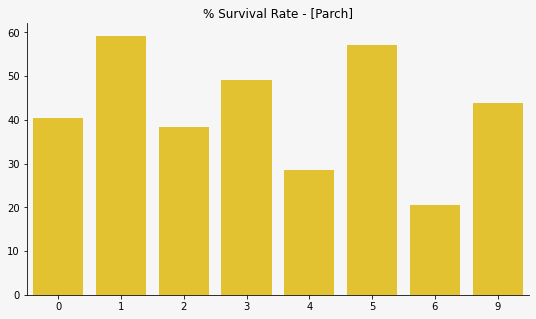

In [13]:
df = train.groupby('Parch')['Survived'].apply(lambda x: x.sum()/len(x)*100)

plt.figure(figsize = (9,5), facecolor='#f6f6f6')
sns.barplot(x = list(df.index), y = df.values, color='#ffd514')
plt.title('% Survival Rate - [Parch]')

ax = plt.gca()
ax.set_facecolor('#f6f6f6')
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

<a id='tag3'></a>
## 3. [Insight-2 : The `Ticket` column & creating new feature `Ticket_class`](#content-table)

<a id='tag3a'></a>
### a) [Insight-1](#content-table)
I found that not all values in this column are string. There are some float values

In [14]:
_ = train['Ticket'].apply(lambda x: type(x))
_.value_counts()

<class 'str'>      95377
<class 'float'>     4623
Name: Ticket, dtype: int64

<a id='tag3b'></a>
### b) [Insight-2](#content-table)
Although >66% values are unique in this column, there is a pattern to naming the ticket.
I found out 12 types of tickets after doing some EDA.   
- Some tickets are just numbers (some of these in float)
- Some tickets start with 'A.', 'A/5', 'A/4' etc  
- Some tickets start with 'C.A', 'CA' etc  
- Some tickets start with 'SC/PARIS', 'SC/Paris', 'SC/AH' etc  
and so on...

In [15]:
pd.set_option('display.max_rows', 101)   # To enable printing 100 rows
train['Ticket'].value_counts().head(50)

A/5            602
C.A.           177
SC/PARIS       145
SOTON/O.Q.      80
SC              57
W./C.           53
A/5.            40
W.E.P.          23
CA              22
STON/O2.        21
PP              15
CA.             15
LP              12
A/4             12
SOTON/OQ        11
9566            10
S.P.            10
9627             9
S.O.C.           9
PC               9
12198            9
12736            9
10507            8
10427            8
10304            8
10103            8
12255            8
11395            8
11066            8
9974             8
11924            8
10653            8
11042            8
10867            8
11193            8
10362            8
11538            8
12428            8
10365            7
10461            7
10929            7
12112            7
11733            7
11847            7
13128            7
8997             7
12480            7
24209            7
11934            7
12044            7
Name: Ticket, dtype: int64

Here I convert `Ticket` column values into one of 12 types

In [16]:
import re

def fn1(x):
    if isinstance(x, str):
        if len(re.findall("^\d+$", x))>0:
            return 'type1'
        if len(re.findall("^(A\.|A/S|A/5|A/4|AQ/4|AQ/3|A4)", x))>0:
            return 'type2'
        if len(re.findall("^(C|CA|CA\.|C\.A\.)", x))>0:
            return 'type3'
        if len(re.findall("^(SC|S\.C\.|SC/PARIS|S\.C\./PARIS|SC/Paris|SC/AH|S\.C\./A\.4)", x))>0:
            return 'type4'
        if len(re.findall("^(PC|PP|P\.P|P/PP)", x))>0:
            return 'type5'
        if len(re.findall("^(W\.C\.|W./C\.|W/C)", x))>0:
            return 'type6'
        if len(re.findall("^(SOTON/O\.Q|SOTON/OQ|STON/O|STON/O2|SOTON/O2)", x))>0:
            return 'type7'
        if len(re.findall("^(WE/P|W\.E\.P)", x))>0:
            return 'type8'
        if len(re.findall("^(F\.C|F\.C\.C|Fa)", x))>0:
            return 'type9'
        if len(re.findall("^(LP)", x))>0:
            return 'type10'
        if len(re.findall("^(S\.O\.C|S\.P|S\.O|P\.P|SO/C)", x))>0:
            return 'type11'
        if len(re.findall("^(S\.W\./PP|SW/PP)", x))>0:
            return 'type12'
        
        else:
            return x
    else:
        return 'type1'
df = train['Ticket'].apply(lambda x: fn1(x))
df.value_counts()

type1     75345
type5      7146
type2      6234
type7      3248
type3      2705
type4      2672
type9       927
type6       711
type11      543
type8       344
type12       69
type10       56
Name: Ticket, dtype: int64

Here we can create a new feature `Ticket_type` based on the above insight.

<a id='tag3c'></a>
### c) [Creating `Ticket_class` column](#content-table)

In [17]:
train['Ticket_class'] = df.values
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_class
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,type1
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,type1
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,type3
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,type2
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,type1


<a id='tag4'></a>
## 4) [Insight-3 : The `Cabin` column & creating new feature `Cabin_filled`](#content-table)

`Cabin` column is more than 67% empty. But we can check if this has got anything to do with `Survival`.
We will compare survival rates of records whose `Cabin` column is filled vs not filled ones. 

For this we create a new column `Cabin_filled` and check survival rate 

In [18]:
train['Cabin_filled'] = train['Cabin'].notnull().astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_class,Cabin_filled
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,type1,1
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,type1,0
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,type3,0
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,type2,0
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,type1,0


In [19]:
train.groupby('Cabin_filled')['Survived'].apply(lambda x: f'{x.sum()/len(x)*100: 0.2f} % ({x.sum()}/{len(x)}) Survived')

Cabin_filled
0     34.21 % (23217/67866) Survived
1     60.86 % (19557/32134) Survived
Name: Survived, dtype: object

We see that those with null values in `Cabin` have almost half the survival rate vs those who have it filled. This looks like a promising feature for our model

<a id='tag5'></a>
## 5) [Insight-4 : Corelation between `Fare` & `Pclass`](#content-table)

`Fare` has 0.133% and 0.134% missing values in train and test data respectively. A way to fill this is by finding a corelation between `Fare` and another column and fill the missing values with different class means of the column. The most promising column that can be corelated to `Fare` is `Pclass` which tells us about the ticket class. 

In [20]:
train.groupby('Pclass')['Fare'].apply(lambda x: x.mean())

Pclass
1    92.653113
2    25.756003
3    20.618226
Name: Fare, dtype: float64

Average fare for each class is quite different and thus we can fill missing `Fare` values with respective class mean fare from `Pclass`

______________